# Capstone Project 1 - Storytelling

In [135]:
%store -r
%matplotlib inline
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from pandas.plotting import table
sns.set(color_codes=True)
sns.set_context("talk")

# Flights 

In [2]:
#show flights dataframe
print(flights.info())
flights.head()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 1824403 entries, (ABE-ATL, 2016-01-01 07:00:00) to (YUM-PHX, 2016-12-31 19:15:00)
Data columns (total 39 columns):
quarter                  int64
month                    int64
day_of_month             int64
day_of_week              int64
fl_date                  object
dt_index                 datetime64[ns]
Day_of_Week              object
Month                    object
hour_of_day              object
unique_carrier           object
fl_num                   int64
origin_airport_id        int64
origin_city_market_id    int64
origin                   object
origin_city_name         object
origin_state_abr         object
origin_state_nm          object
dest_airport_id          int64
dest_city_market_id      int64
dest                     object
dest_city_name           object
dest_state_abr           object
dest_state_nm            object
link                     object
unique_carrier_nm        object
crs_dep_time             int64
dep_t

quarter  month  day_of_month  day_of_week  \
link    dt_index                                                         
ABE-ATL 2016-01-01 07:00:00        1      1             1            5   
        2016-01-01 16:09:00        1      1             1            5   
        2016-01-02 06:00:00        1      1             2            6   
        2016-01-02 16:12:00        1      1             2            6   
        2016-01-03 05:57:00        1      1             3            7   

                                fl_date            dt_index Day_of_Week  \
link    dt_index                                                          
ABE-ATL 2016-01-01 07:00:00  2016-01-01 2016-01-01 07:00:00      Friday   
        2016-01-01 16:09:00  2016-01-01 2016-01-01 16:09:00      Friday   
        2016-01-02 06:00:00  2016-01-02 2016-01-02 06:00:00    Saturday   
        2016-01-02 16:12:00  2016-01-02 2016-01-02 16:12:00    Saturday   
        2016-01-03 05:57:00  2016-01-03 2016-01-03 05:57:00      Sunday   

                               Month hour_of_day unique_carrier   ...     \
link    dt_index                                                  ...      
ABE-ATL 2016-01-01 07:00:00  January       07:00             EV   ...      
        2016-01-01 16:09:00  January       16:00             EV   ...      
        2016-01-02 06:00:00  January       06:00             EV   ...      
        2016-01-02 16:12:00  January       16:00             EV   ...      
        2016-01-03 05:57:00  January       05:00             EV   ...      

                             wheels_on  taxi_in  crs_arr_time arr_time  \
link    dt_index                                                         
ABE-ATL 2016-01-01 07:00:00      900.0      7.0           845    907.0   
        2016-01-01 16:09:00     1812.0      5.0          1828   1817.0   
        2016-01-02 06:00:00      753.0      6.0           812    759.0   
        2016-01-02 16:12:00     1800.0      7.0          1827   1807.0   
        2016-01-03 05:57:00      753.0      5.0           813    758.0   

                            arr_deviation arr_delay crs_elapsed_time  \
link    dt_index                                                       
ABE-ATL 2016-01-01 07:00:00          22.0      22.0            135.0   
        2016-01-01 16:09:00         -11.0       0.0            138.0   
        2016-01-02 06:00:00         -13.0       0.0            132.0   
        2016-01-02 16:12:00         -20.0       0.0            137.0   
        2016-01-03 05:57:00         -15.0       0.0            133.0   

                             actual_elapsed_time  air_time distance  
link    dt_index                                                     
ABE-ATL 2016-01-01 07:00:00                127.0     111.0    692.0  
        2016-01-01 16:09:00                128.0     115.0    692.0  
        2016-01-02 06:00:00                119.0     101.0    692.0  
        2016-01-02 16:12:00                115.0      98.0    692.0  
        2016-01-03 05:57:00                121.0     107.0    692.0  

[5 rows x 39 columns]

### Flight Frequency

###### Frequency by Time 

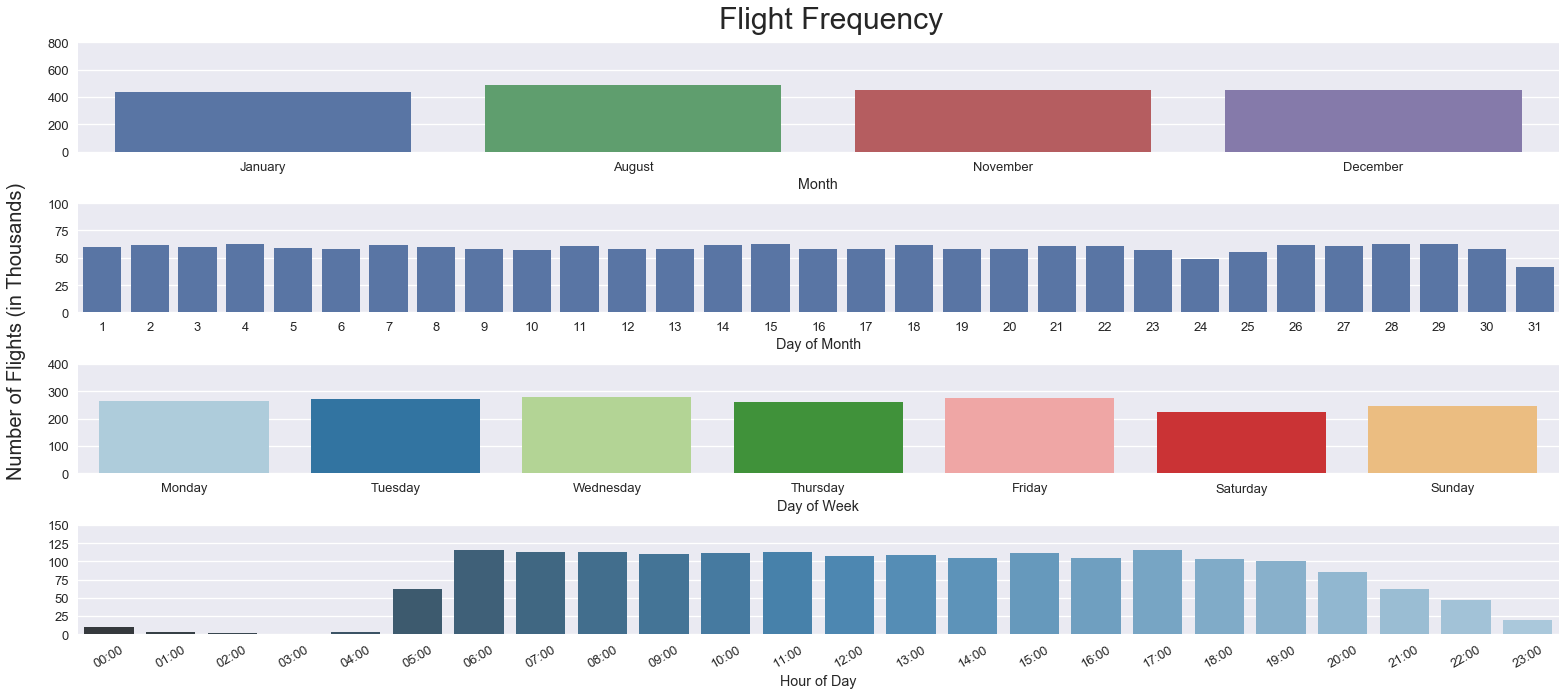

In [192]:
#create countplots of flights organized by temporal identifiers
fig, (ax0, ax1, ax2, ax3) = plt.subplots(nrows=4, figsize=(22,10))
sns.countplot("Month", data=flights, ax=ax0)
sns.countplot("day_of_month", data=flights, ax=ax1, color='b')
sns.countplot("Day_of_Week", data=flights, ax=ax2, palette='Paired',
              order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
sns.countplot("hour_of_day", data=flights, ax=ax3, palette='Blues_d',
              order=['00:00','01:00','02:00','03:00','04:00','05:00','06:00','07:00','08:00',
                    '09:00','10:00','11:00','12:00','13:00','14:00','15:00','16:00','17:00',
                    '18:00','19:00','20:00','21:00','22:00','23:00'])
fig.tight_layout()
fig.subplots_adjust(top=0.9)
fig.text(0.01, 0.5, 'Number of Flights (in Thousands)', va='center', rotation='vertical', fontsize=20)
ax0.set(xlabel="Month", ylabel='', ylim=(0,800000), yticks=np.arange(0,800001,200000),
        yticklabels=['0','200','400','600','800'])
ax1.set(xlabel="Day of Month", ylabel='', ylim=(0,100000), yticks=np.arange(0,100001,25000),
        yticklabels=['0','25','50','75','100'])
ax2.set(xlabel="Day of Week", ylabel='', ylim=(0,400000), yticks=np.arange(0,500001,100000),
        yticklabels=['0','100','200','300','400'])
ax3.set(xlabel="Hour of Day",ylabel='', ylim=(0,150000), yticks=np.arange(0,150001,25000),
        yticklabels=['0','25','50','75','100','125','150'])
ax3.set_xticklabels(ax3.get_xticklabels(), rotation=30)
title = plt.suptitle('Flight Frequency', fontsize=30)
title.set_x(0.53)
title.set_y(0.95)
plt.savefig('Freq_by_time.png')

##### Frequency by Carrier
<div class="span5 alert alert-success">
<p>Data consists of the 12 major domestic passenger airlines.
The United States Department of Transportation defines a major carrier or major airline carrier as a U.S.-based airline that posts more than $1 billion in revenue during a fiscal year, grouped accordingly as "Group III" ("Air Carrier Groupings 2016", U.S. Bureau of Transportation)</p>
</div>

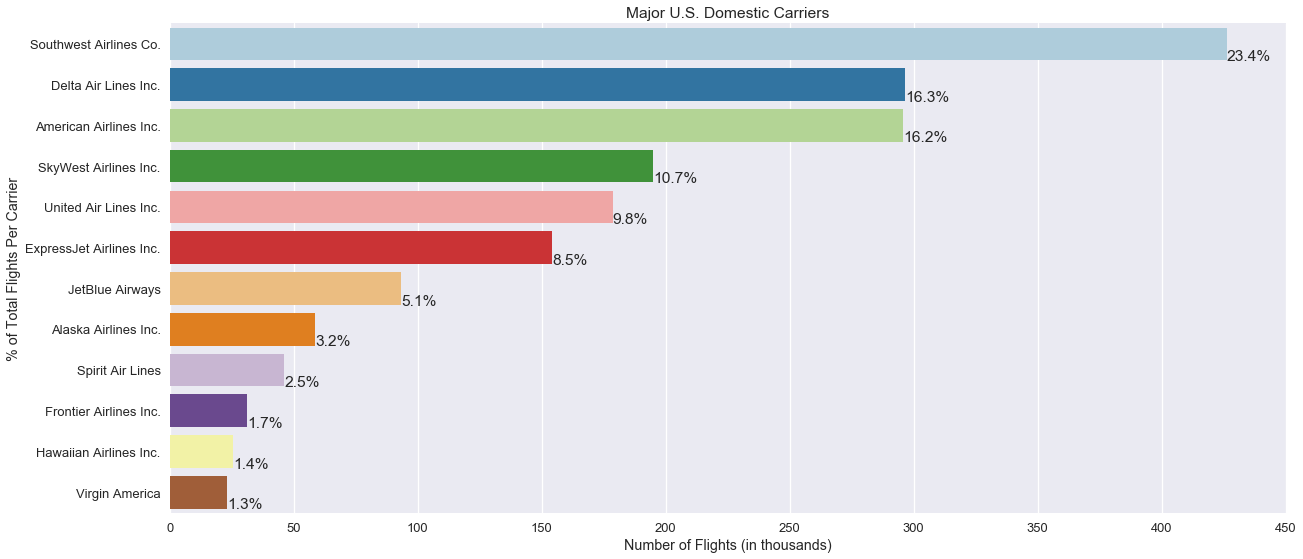

In [179]:
# plot number of flights frequency per carrier
fig, ax = plt.subplots(figsize=(20,9))
sns.countplot(y="unique_carrier_nm", data=flights, palette="Paired",ax=ax,
             order=flights.unique_carrier_nm.value_counts().index.tolist())
ax.set(title="Major U.S. Domestic Carriers", xlabel='Number of Flights (in thousands)', xticks=np.arange(0,450001,50000),
       ylabel='% of Total Flights Per Carrier', xticklabels=[str(i) for i in np.arange(0,451,50)])
for p in ax.patches:
    ax.annotate('{:.1f}%'.format(100.*p.get_width()/len(flights)), 
                (p.get_width()+0.5, p.get_bbox().get_points()[1,1]))
plt.savefig('Total_flights_by_carrier.png')

##### Frequency by Location

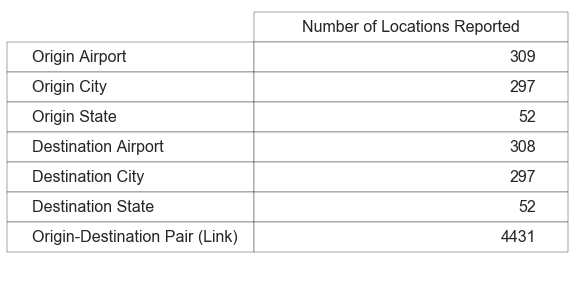

In [164]:
#create dataframe of location identifier columns with unique value counts
location_cols = ['origin', 'origin_city_name', 'origin_state_nm', 'dest', 'dest_city_name', 'dest_state_nm', 'link']
unique_loc_counts = pd.DataFrame({'Location Identifier':['Origin Airport', 'Origin City', 'Origin State',
                                                     'Destination Airport', 'Destination City',
                                                     'Destination State','Origin-Destination Pair (Link)'],
                              'Number of Locations Reported':[len(flights[i].unique()) for i in location_cols]}).set_index('Location Identifier')

#show dataframe of unique location counts
fig, ax = plt.subplots(figsize=(9, 5))
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
ax.set_frame_on(False)
tb = table(ax, unique_loc_counts, loc='upper right', colWidths=[0.25]*len(unique_loc_counts.columns))
tb.auto_set_font_size(False) 
tb.set_fontsize(16) 
tb.scale(2.5, 2.5) 
plt.savefig('Freq_by_location_id.png')

In [6]:
#define function for getting list and dataframe slice of top n values in column
def top_nvals(series, data, size):
    ntop_counts = series.value_counts()
    ntop_lst = ntop_counts.nlargest(size).index.tolist()
    ntop_df = data.loc[series.isin(ntop_counts[:size].index.tolist())]
    return ntop_lst, ntop_df

In [7]:
'''unpack lists and dataframes of top values per location identifier 
'''
#top 10 origin airports
top10_OA, topOA_df = top_nvals(flights.origin, flights, 10)

#top 10 origin cities
top10_OC, topOC_df = top_nvals(flights.origin_city_name, flights, 10)

#top 10 origin states
top10_OS, topOS_df = top_nvals(flights.origin_state_nm, flights, 10)

#top 10 destination airports
top10_DA, topDA_df = top_nvals(flights.dest, flights, 10)

#top 10 destination cities
top10_DC, topDC_df = top_nvals(flights.dest_city_name, flights, 10)

#top 10 destination states
top10_DS, topDS_df = top_nvals(flights.dest_state_nm, flights, 10)

#top 15 links
top15_links, toplinks_df = top_nvals(flights.link, flights, 15)

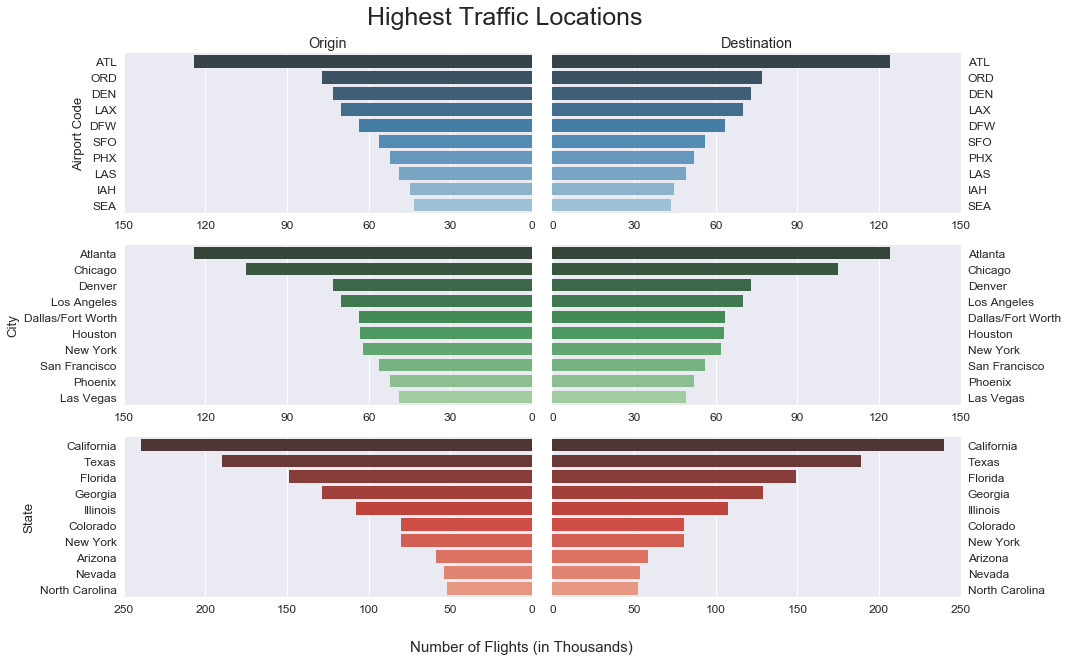

In [132]:
#plot number of flights per location identifier
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15,10))
sns.countplot(y='origin', data=topOA_df, ax=axes[0,0], order=top10_OA, palette='Blues_d')
sns.countplot(y='dest', data=topDA_df, ax=axes[0,1], order=top10_DA, palette='Blues_d')
sns.countplot(y='origin_city_name', data=topOC_df, ax=axes[1,0], order=top10_OC, palette='Greens_d')
sns.countplot(y='dest_city_name', data=topDC_df, ax=axes[1,1], order=top10_DC, palette='Greens_d')
sns.countplot(y='origin_state_nm', data=topOS_df, ax=axes[2,0], order=top10_OS, palette='Reds_d')
sns.countplot(y='dest_state_nm', data=topDS_df, ax=axes[2,1], order=top10_DS, palette='Reds_d')
axes[0,0].set(title='Origin', xlabel='', ylabel='Airport Code',xticks=np.arange(0,150001,30000),
              xticklabels=['0','30','60','90','120','150'], xlim=(0,150000))
axes[0,0].invert_xaxis()
axes[0,1].set(title='Destination', xlabel='', ylabel='', xticks=np.arange(0,150001,30000), 
              xticklabels=[str(i) for i in np.arange(0,151,30)], xlim=(0,150000))
axes[0,1].tick_params('y', labelleft=False, labelright=True)
axes[1,0].set(xlabel='', ylabel='City', xticks=np.arange(0,150001,30000), xlim=(0,150000),
             xticklabels=[str(i) for i in np.arange(0,151,30)])
axes[1,0].invert_xaxis()
axes[1,1].set(xlabel='',ylabel='',xticks=np.arange(0,150001,30000), xlim=(0,150000),
             xticklabels=[str(i) for i in np.arange(0,151,30)])
axes[1,1].tick_params('y', labelleft=False, labelright=True)
axes[2,0].set(xlabel='',ylabel='State',xticks=np.arange(0,250001,50000), xlim=(0,250000),
             xticklabels=[str(i) for i in np.arange(0,251,50)])
axes[2,0].invert_xaxis()
axes[2,1].set(xlabel='',ylabel='',xticks=np.arange(0,250001,50000),xlim=(0,250000),
             xticklabels=[str(i) for i in np.arange(0,251,50)])
axes[2,1].tick_params('y', labelleft=False, labelright=True)
fig.text(0.39, 0.05, 'Number of Flights (in Thousands)', fontsize=15)
fig.text(0.35, 0.92, 'Highest Traffic Locations', fontsize=25)
plt.subplots_adjust(wspace=0.05)
plt.savefig('Highest_traffic_locations.png')

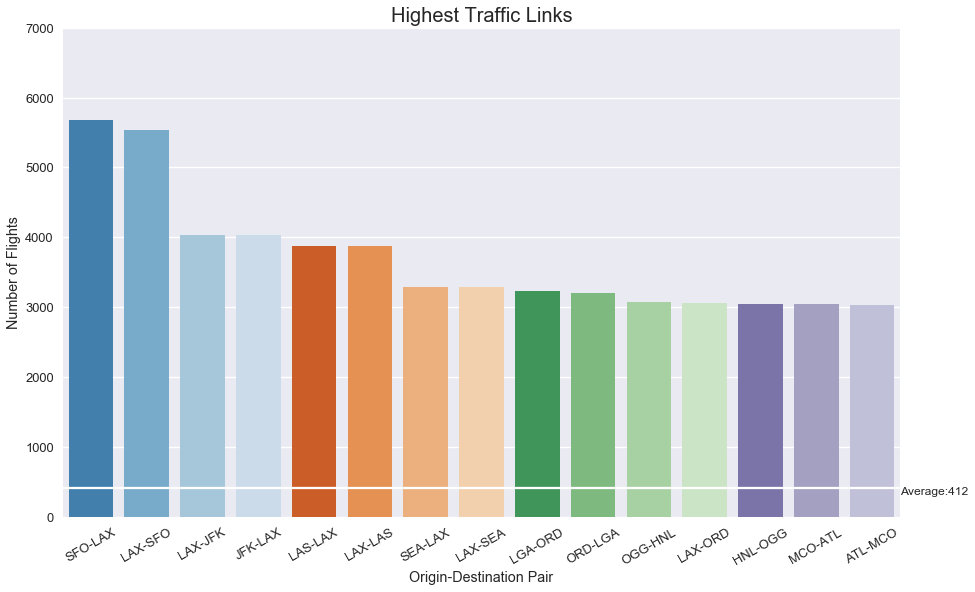

In [176]:
#plot number of flights per link
fig, ax = plt.subplots(figsize=(15,9))
sns.countplot(x="link", data=toplinks_df, palette="tab20c", ax=ax,
             order=top15_links)
ax.set(xlabel='Origin-Destination Pair', ylabel='Number of Flights', ylim=(0,7000))
ax.set_title('Highest Traffic Links', fontsize=20)
ax.set_xticklabels(ax.get_xticklabels(), rotation=30)
plt.axhline(flights.link.value_counts().mean(), color='w')
fig.text(0.9, 0.16, 'Average:{0:.0f}'.format(flights.link.value_counts().mean()), fontsize=12)
plt.savefig('Highest_traffic_links.png')

### Flight Delays

<div class="span5 alert alert-success">
<p>A flight is counted as "on time" if it operated less than 15 minutes after the scheduled time shown in the carriers' Computerized Reservations Systems (CRS), with departure and arrival times being calculated from gate to gate, not including taxi or airtime.</p>
</div>

##### Distribution of Flight Delays

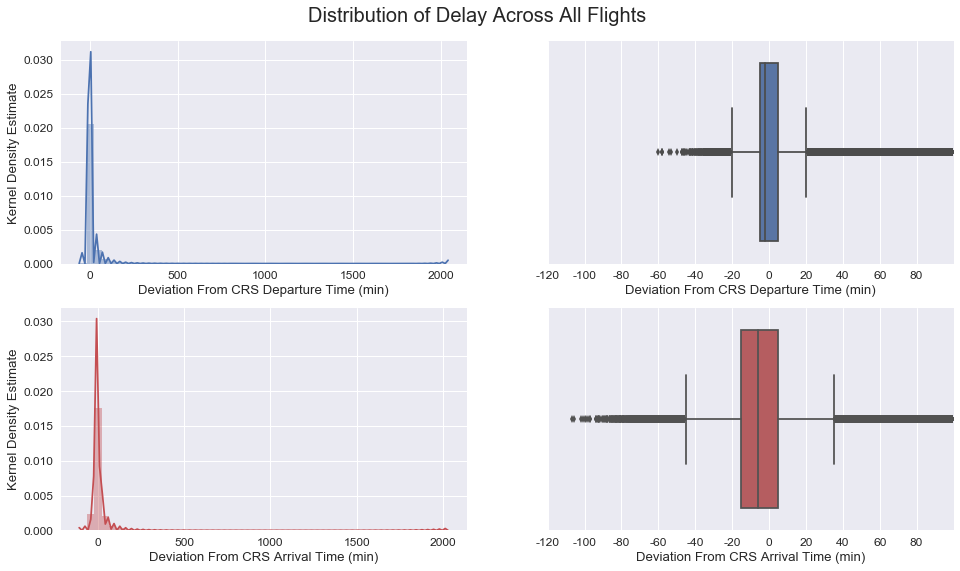

In [129]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16,9))
sns.distplot(flights['dep_deviation'], ax=axes[0,0])
sns.distplot(flights['arr_deviation'], ax=axes[1,0], color='r')
sns.boxplot(flights[flights['dep_deviation'] < 100].dep_deviation, ax=axes[0,1])
sns.boxplot(flights[flights['arr_deviation'] < 100].arr_deviation, ax=axes[1,1], color='r')
axes[0,0].set(xlabel='Deviation From CRS Departure Time (min)', ylabel='Kernel Density Estimate')
axes[0,1].set(xlabel='Deviation From CRS Departure Time (min)', xlim=(-120, 100), 
              xticks=np.arange(-120,100,20), xticklabels=[str(int(i)) for i in np.arange(-120,100,20)])
axes[1,0].set(xlabel='Deviation From CRS Arrival Time (min)', ylabel='Kernel Density Estimate')
axes[1,1].set(xlabel='Deviation From CRS Arrival Time (min)', xlim=(-120, 100), 
              xticks=np.arange(-120,100,20), xticklabels=[str(int(i)) for i in np.arange(-120,100,20)])
fig.text(0.34, 0.91, 'Distribution of Delay Across All Flights', fontsize=20)
plt.savefig('Delay_dist_all_flights.png')

##### Delay Proportions

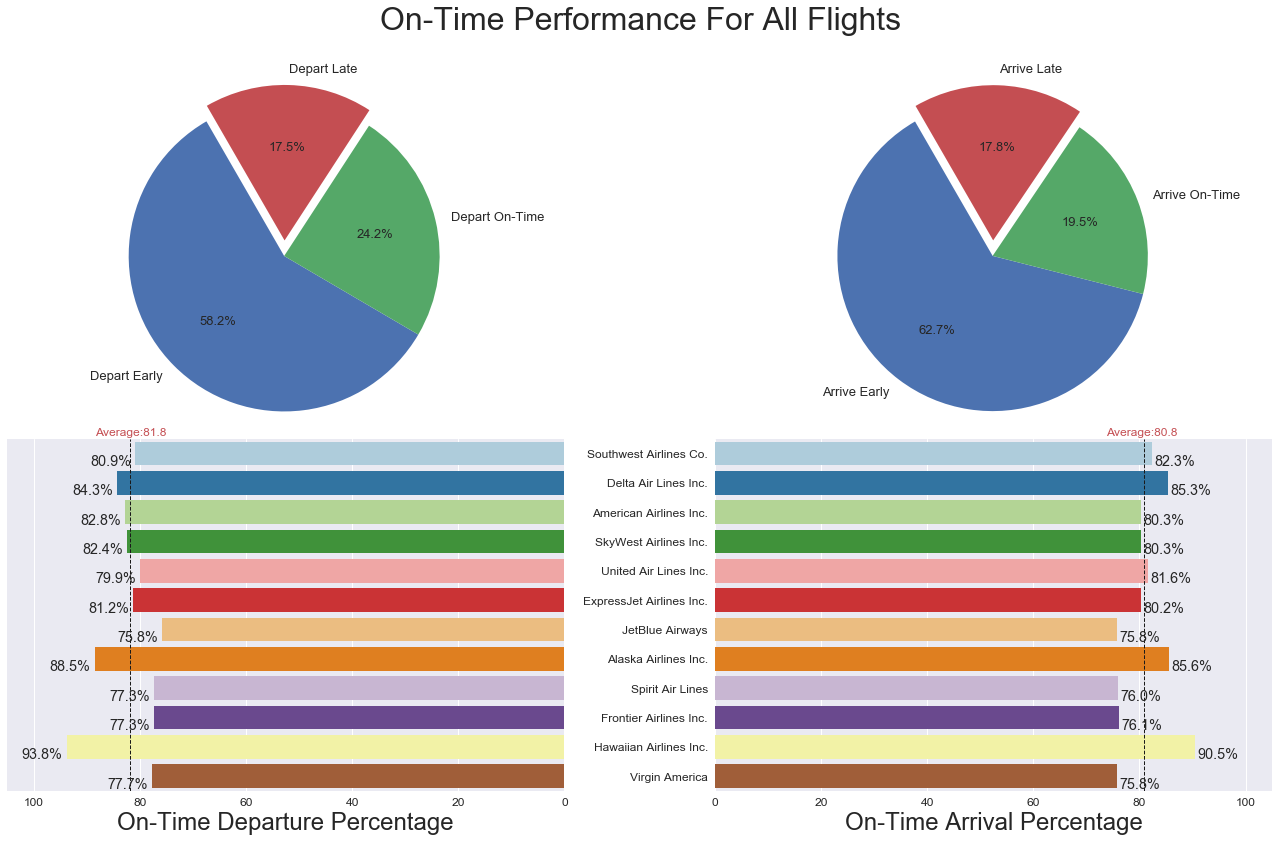

In [127]:
#define function for unpacking performance scenarios
def perf_scenarios(df, col):
    early_col = df.query('{0} < 0'.format(col))[col]
    on_time_col = df.query('{0} >= 0 & {0} <= 15'.format(col))[col]
    late_col = df.query('{0} > 15'.format(col))[col]
    return early_col, on_time_col, late_col

#get performance scenarios for departure and arrival of all flights
early_dep, on_time_dep, late_dep = perf_scenarios(flights, 'dep_deviation')
early_arr, on_time_arr, late_arr = perf_scenarios(flights, 'arr_deviation')

#define function for creating dataframe of on-time performance rates
def perf_rate_df(df, col):
    on_time = df.query('{0} < 15'.format(col))
    carrier_on_time = on_time.unique_carrier_nm.value_counts()
    total = flights.unique_carrier_nm.value_counts()
    carrier_performance = pd.DataFrame(round((carrier_on_time / total) * 100, 1))
    carrier_performance.reset_index(inplace=True)
    return carrier_performance

#get dataframes of on-time performance rates per carrier
dep_performance = perf_rate_df(flights, 'dep_deviation')
arr_performance = perf_rate_df(flights, 'arr_deviation')

#define function for adding performance rate and average to plot
def add_per(ax, df, offset):
    for p in ax.patches:
        ax.annotate('{:.1f}%'.format(p.get_width()),
                    (p.get_width()+offset, p.get_bbox().get_points()[1,1]))
    ax.axvline(df.unique_carrier_nm.mean(), color='k', linestyle='dashed', linewidth=1)

#create pie plot labels and sizes
dlabels = ['Depart Early', 'Depart On-Time', 'Depart Late']
dsizes = [len(early_dep), len(on_time_dep), len(late_dep)]
alabels = ['Arrive Early', 'Arrive On-Time', 'Arrive Late']
asizes = [len(early_arr), len(on_time_arr), len(late_arr)] 
explode = (0,0,0.1)

#plot departure and arrival on time performance
sns.set(font_scale=1.2)
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(18,12))
axes[0,0].pie(dsizes, labels=dlabels, autopct='%1.1f%%', shadow=False,
            explode=explode, startangle= 120, textprops={'fontsize': 13})
axes[0,0].axis('equal')
axes[0,1].pie(asizes, labels=alabels, autopct='%1.1f%%', shadow=False, 
            explode=explode, startangle= 120, textprops={'fontsize': 13})
axes[0,1].axis('equal')
sns.barplot(x='unique_carrier_nm', y='index', data=dep_performance, 
            palette='Paired', ax=axes[1,0])
axes[1,0].set(ylabel='', xticks=np.arange(0,101,20), xlim=(0,105),
              xticklabels=[str(i) for i in np.arange(0,101,20)], yticks=[])
axes[1,0].set_xlabel('On-Time Departure Percentage', fontsize=24)
axes[1,0].invert_xaxis()
add_per(axes[1,0], dep_performance, 8.5)
sns.barplot(x='unique_carrier_nm', y='index', data=arr_performance,
            palette='Paired', ax=axes[1,1])
axes[1,1].set(ylabel='', xlim=(0,105), xticks=np.arange(0,101,20),
              xticklabels=[str(i) for i in np.arange(0,101,20)])
axes[1,1].set_xlabel('On-Time Arrival Percentage', fontsize=24)
add_per(axes[1,1], arr_performance, 0.5)
fig.tight_layout()
fig.subplots_adjust(top=0.9)
fig.text(0.3, .95, 'On-Time Performance For All Flights', fontsize=32)
fig.text(.08, .48, 'Average:{0:.1f}'.format(dep_performance.unique_carrier_nm.mean()),
         fontsize=12, color='r') 
fig.text(.86, .48, 'Average:{0:.1f}'.format(arr_performance.unique_carrier_nm.mean()),
         fontsize=12, color='r')
plt.savefig('On_time_performance.png')

##### Distribution of Delay by Carrier

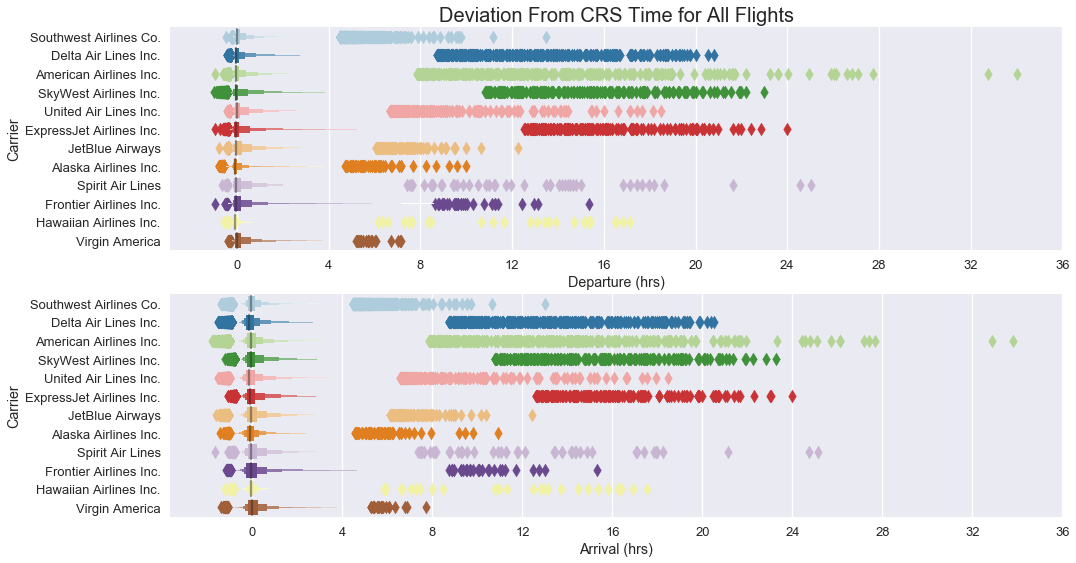

In [125]:
fig, (ax0, ax1) = plt.subplots(nrows=2, figsize=(16,9))
sns.lvplot(y='unique_carrier_nm', x='arr_deviation', ax=ax1, data=flights,
           order=flights.unique_carrier_nm.value_counts().index.tolist(), palette='Paired')
sns.lvplot(y='unique_carrier_nm', x='dep_deviation', ax=ax0, data=flights,
           order=flights.unique_carrier_nm.value_counts().index.tolist(), palette='Paired')
ax1.set(xlabel='Arrival (hrs)', ylabel='Carrier', xticks=np.arange(0,2400,240),
        xticklabels=np.arange(0,40,4))
ax0.set(xlabel='Departure (hrs)', ylabel='Carrier', xticks=np.arange(0,2400,240),
        xticklabels=np.arange(0,40,4))
ax0.set_title('Deviation From CRS Time for All Flights', fontsize=20)
plt.savefig('Delay_dist_by_carrier.png')

##### Distribution of Delay for Highest Traffic Airports

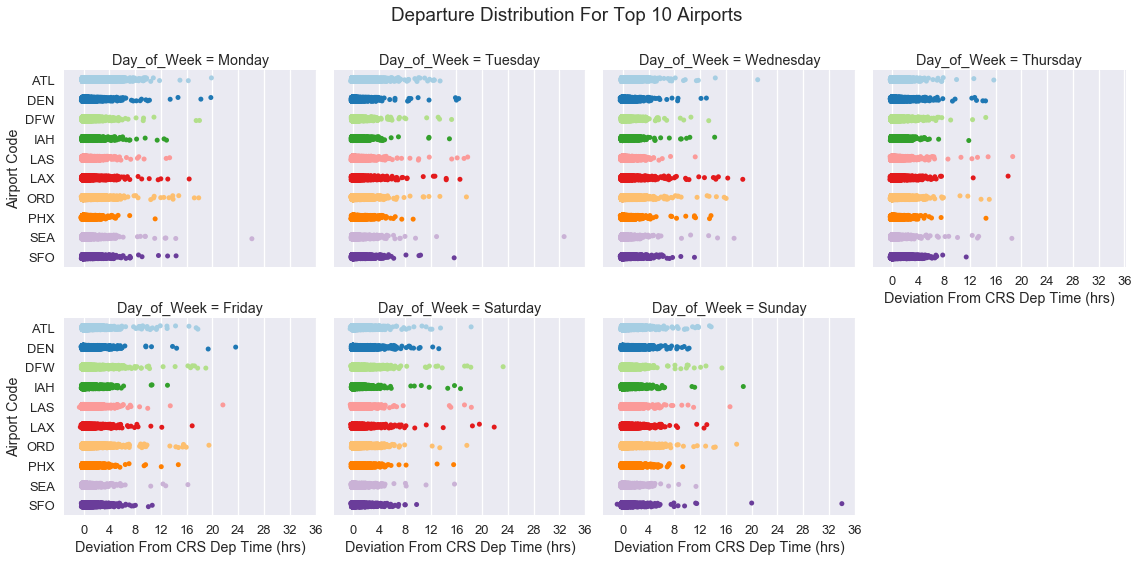

In [121]:
g = sns.factorplot(y='origin', x='dep_deviation', col ='Day_of_Week', col_wrap=4,
               data=topOA_df, kind='strip', palette='Paired', jitter=True,
               col_order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
g.fig.suptitle('Departure Distribution For Top 10 Airports')
g.set(xticks=np.arange(0,2400,240), xticklabels=np.arange(0,40,4))
g.set_axis_labels('Deviation From CRS Dep Time (hrs)','Airport Code')
plt.subplots_adjust(top=0.87)
plt.savefig('Dep_dist_top_airports.png')

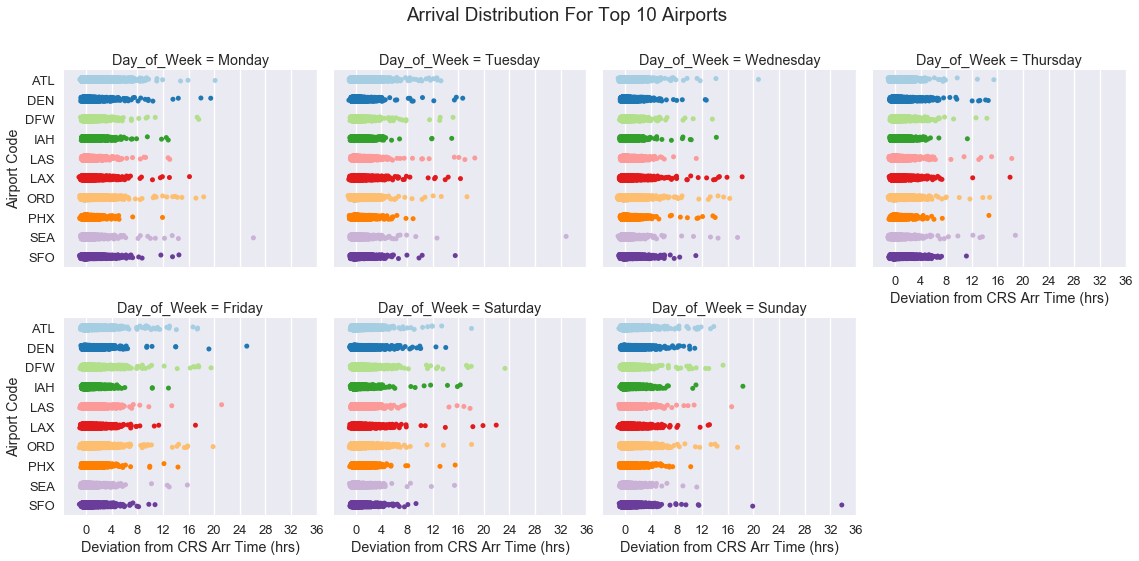

In [120]:
g = sns.factorplot(y='origin', x='arr_deviation', col ='Day_of_Week', col_wrap=4,
               data=topOA_df, kind='strip', palette='Paired', jitter=True,
               col_order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
plt.subplots_adjust(top=0.87)
g.fig.suptitle('Arrival Distribution For Top 10 Airports')
g.set(xticks=np.arange(0,2400,240), xticklabels=np.arange(0,40,4))
g.set_axis_labels('Deviation from CRS Arr Time (hrs)','Airport Code')
plt.savefig('Arr_dist_top_airports.png')

# Network 

In [15]:
#show number of nodes, edges, self-loops in network
print('Number of Airports: ', len(G.nodes()))
print('Number of Origin-Destination Pairs: ', len(G.edges()))
print('Number of Self-Loops: ', G.number_of_selfloops())

Number of Airports:  309
Number of Origin-Destination Pairs:  4431
Number of Self-Loops:  0


In [104]:
#create function to get subgraph of top N number of nodes from node attribute
def subgraph_top_nodes_by_attribute(graph, N, attribute):
    lst = sorted([d[attribute] for (n,d) in graph.nodes(data=True)], reverse=True)[:N]
    top_N_nodes = [n for (n,d) in graph.nodes(data=True) if d[attribute] in lst]
    return graph.subgraph(top_N_nodes)

#create function to merge nodes in subgraph by attribute
def subgraph_nodes_merged_by_attribute(g, new_nodes, attr):
    #create subgraph from new node list by attribute
    g = g.copy()
    sub_nodes = [n for (n,d) in g.nodes(data=True) if d[attr] in new_nodes]
    sub_g = g.subgraph(sub_nodes)

    #aggregate attributes from nodes to be merged
    new_attributes = {}
    for n in new_nodes:
        new_attributes[n] = {a:d['Total Flights'] for (a,d) in sub_g.nodes(data=True) if d[attr] == n}   
    for n, d in new_attributes.items():
        total_flights = []
        for i, v in d.items():
            total_flights.append(v)
        new_attributes[n] = {'Total Flights': np.sum(total_flights), 'Nodes':list(d.keys())}

    #add new nodes and attributes to graph
    g.add_nodes_from(((i,d) for (i,d) in new_attributes.items()))

    #aggregate edges from nodes to be merged
    edges = []
    for n1,n2,d in sub_g.edges(data=True):
        for i, v in new_attributes.items():
            if n1 in v['Nodes']:
                n1 = i
            elif n2 in v['Nodes']:
                n2 = i
        edges.append((n1,n2,d))
    edge_df = pd.DataFrame(edges)
    edge_df.columns = ['origin','dest','data']
    for i,r in edge_df.iterrows():
        for k,v in r['data'].items():
            edge_df.loc[i,k] = v
    edge_gb = edge_df.groupby(['origin','dest']).sum()
    edge_dict = edge_gb.to_dict('index')
    edges = [(k[0],k[1],d) for (k,d) in edge_dict.items()]

    #add edges to new nodes
    g.add_edges_from(edges)

    #create subgraph of merged nodes
    merged_subgraph = g.subgraph(new_nodes)
    return merged_subgraph

#create function to plot subgraph 
def plot_subgraph(graph, ax, node_color, edge_cmap, title):
    pos = nx.layout.circular_layout(graph)
    node_sizes = [0.01 * v for i,v in nx.get_node_attributes(graph,'Total Flights').items()]
    edge_colors = [np.log(v) for i,v in nx.get_edge_attributes(graph,'flight_count').items()]
    edge_alphas = [v for i,v in nx.get_edge_attributes(graph,'weight').items()]
    if max(edge_alphas) > 1:
        edge_alphas = MinMaxScaler().fit_transform(np.array(edge_alphas).reshape(-1,1))
    edge_cbar = [v for i,v in nx.get_edge_attributes(graph,'flight_count').items()]
    nodes = nx.draw_networkx_nodes(graph, pos, node_size=node_sizes, node_color=node_color, ax=ax)
    edges = nx.draw_networkx_edges(graph, pos, node_size=node_sizes, arrowstyle='->', ax=ax,
                               arrowsize=10, edge_color=edge_colors, edge_cmap=edge_cmap, width=2)
    labels = nx.draw_networkx_labels(graph, pos, font_size=16, font_weight='ultralight',
                                     font_family='sans-serif', font_color='k', ax=ax)
    for i in range(len(graph.edges())):
        edges[i].set_alpha(edge_alphas[i])
    pc = mpl.collections.PatchCollection(edges, cmap=edge_cmap)
    pc.set_array(edge_cbar)
    cbar= plt.colorbar(pc, ax=ax)
    cbar.set_label('Number of Flights', fontsize=18)
    ax.set_title(title, fontsize=22)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

In [105]:
#get subgraph of top 10 nodes by total flights
top10_airports = subgraph_top_nodes_by_attribute(G, 10, 'Total Flights')

#get subgraph of top 10 nodes from previous list of top 10 cities
top10_cities = subgraph_nodes_merged_by_attribute(G, top10_OC, 'city_name')

#get subgraph of top 10 nodes from previous list of top 10 states
top10_states = subgraph_nodes_merged_by_attribute(G, top10_OS, 'state_name')

#get subgraph of top 10 nodes by degree centrality
top10_deg_cent = subgraph_top_nodes_by_attribute(G, 10, 'Degree Centrality')

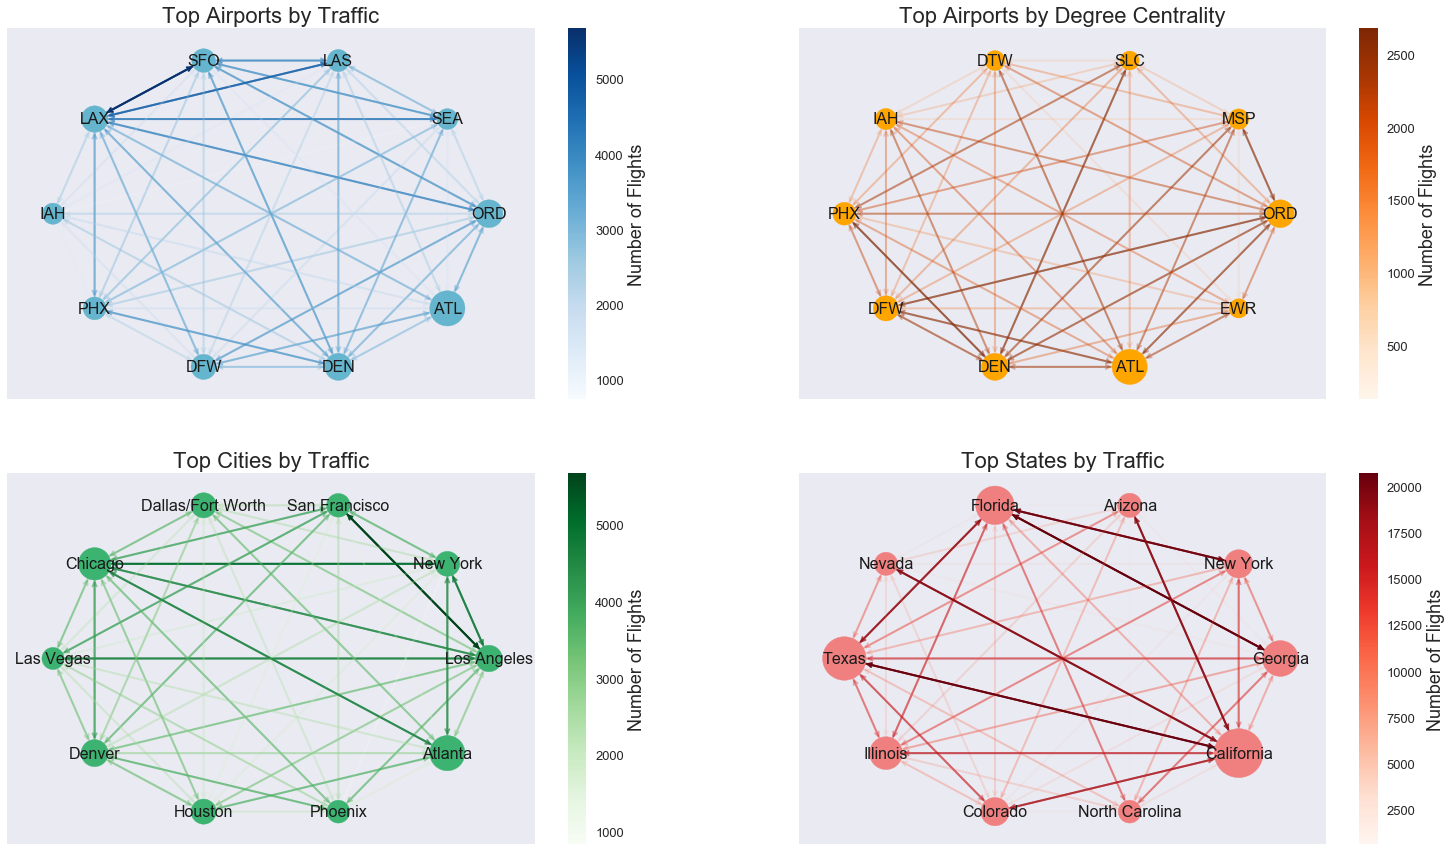

In [124]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(26, 15))
plot_subgraph(top10_airports, ax[0,0], 'c', plt.cm.Blues, 'Top Airports by Traffic')
plot_subgraph(top10_deg_cent, ax[0,1], 'orange', plt.cm.Oranges, 'Top Airports by Degree Centrality')
plot_subgraph(top10_cities, ax[1,0], 'mediumseagreen', plt.cm.Greens, 'Top Cities by Traffic')
plot_subgraph(top10_states, ax[1,1], 'lightcoral', plt.cm.Reds, 'Top States by Traffic')
plt.savefig('Network_plots.png')